## Observations and Insights 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df= pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [65]:
# Checking the number of mice.
mice=len(mouse_study_df["Mouse ID"].unique())
mice

249

In [66]:
# # # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=mouse_study_df.loc[mouse_study_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [67]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = mouse_study_df['Mouse ID'] =='g989'
duplicate_mouse

duplicate_data = mouse_study_df.loc[duplicate_mouse]
duplicate_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [68]:
# #Create a clean DataFrame by dropping the duplicate mouse by its ID.
# identify_dups=duplicate_data["Mouse ID"].isin(mouse_study_df)
# identify_dups
# # # identify_dups.iloc[107,]
# data_df=duplicate_data[identify_dups== False]
# data_df

# identify_dups = mouse_study_df["Mouse ID"].isin(duplicate_data)
# identify_dups
# #identify_dups.iloc[107,]
# clean_data_df=mouse_study_df[identify_dups == False]
# clean_data_df.head()
# # clean_data_df=mouse_study_df.drop_duplicates(["Mouse g989")
# # clean_data_df

clean_data=mouse_study_df["Mouse ID"]!="g989"
clean_data
clean_data_df= mouse_study_df[clean_data==True]
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [69]:
# Checking the number of mice in the clean DataFrame.
mice_no=len(clean_data_df["Mouse ID"].unique())
mice_no

248

## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#TMV= Tumor Volume
mean= clean_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median= clean_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance=clean_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation=clean_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem=clean_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stat_table=pd.DataFrame({"Mean TMV":mean,
                                "Median TMV":median,
                                "Variance TMV":variance,
                                "STD TMV":standard_deviation,
                                "Sem TMV":sem})
summary_stat_table

,Mean TMV,Median TMV,Variance TMV,STD TMV,Sem TMV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# # This method produces everything in a single groupby function
# mean= clean_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
# median= clean_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
# variance=clean_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
# standard_deviation=clean_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
# sem=clean_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# summary_stat_table=pd.DataFrame({"Mean TMV":mean,
#                                 "Median TMV":median,
#                                 "Variance TMV":variance,
#                                 "STD TMV":standard_deviation,
#                                 "Sem TMV":sem})
# summary_stat_table

# clean_data_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","variance","standard_deviation","sem"]})


## Bar and Pie Charts

Text(0, 0.5, 'Total number of mice')

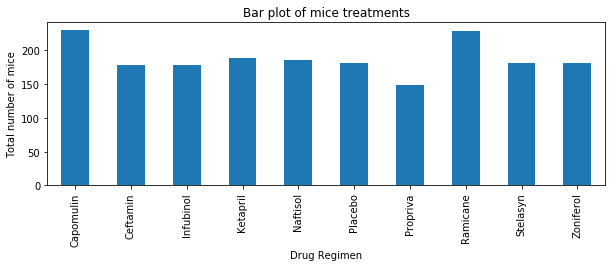

In [98]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treatment_bar=clean_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_treatment_bar

mice_treatment_bar.plot(kind="bar",figsize=(10,3))
plt.title("Bar plot of mice treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of mice")

In [99]:
# # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# graph_data=clean_data_df[["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]]
# clean_data_df.plot(kind="bar", use_index=True, grid=True, yerr="graph_data",marker="d",linewidth=0.5)
# clean_data_df.show()

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
